# Support Vector Classifiers Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# generate the synthetic dataset
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features= 2, n_classes=2, n_clusters_per_class=1, n_redundant= 0)

In [5]:
pd.DataFrame(X)

,0,1
0,-1.294842,1.160751
1,1.774720,2.410649
2,-1.540928,-0.841946
3,-1.593568,0.852002
4,-0.335403,1.123649
...,...,...
995,-1.105632,0.938596
996,-0.198148,1.176418
997,-1.688558,-2.099489
998,-1.970088,0.636127


In [6]:
pd.DataFrame(y)

,0
0,1
1,1
2,0
3,1
4,1
...,...
995,1
996,1
997,0
998,1


In [7]:
# split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='0', ylabel='1'>

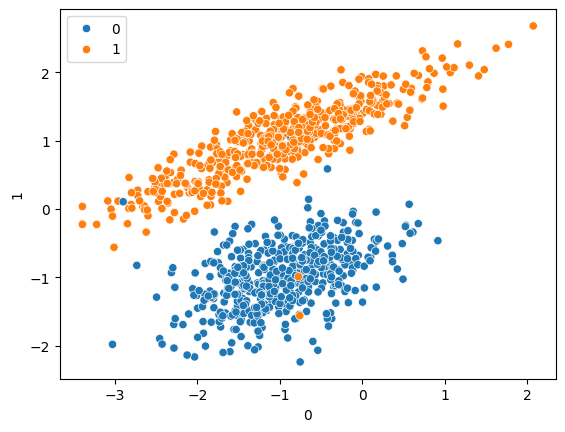

In [11]:
# plot the set
sns.scatterplot(x= pd.DataFrame(X)[0], y= pd.DataFrame(X)[1], hue=y)

In [12]:
# model svm (svc)
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


SVC(kernel='linear')

In [15]:
svc.coef_, svc.intercept_

(array([[-0.96583845,  2.20790879]]), array([-1.18269175]))

In [13]:
# predict the test set
y_pred = svc.predict(X_test)

In [16]:
# Performance metrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.99      1.00      1.00       105

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

[[ 94   1]
 [  0 105]]


We change the n_cluster_per_classes=2 then dataset isn't seperable by linear kernel. So we use Non-linear kernel 
# Use RBT

In [17]:
X,y = make_classification(n_samples=1000, n_features =2, n_classes=2, n_clusters_per_class =2, n_redundant =0)

<Axes: xlabel='0', ylabel='1'>

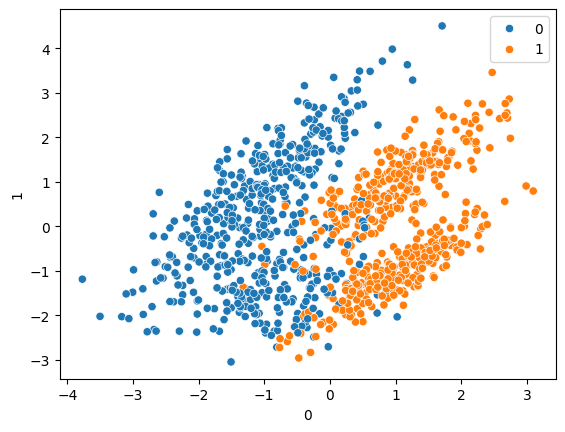

In [18]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sns.scatterplot(x= pd.DataFrame(X)[0], y= pd.DataFrame(X)[1], hue=y)

In [20]:
# model 
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        93
           1       0.93      0.93      0.93       107

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200

[[86  7]
 [ 8 99]]


# Use Polynomial

In [21]:
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
y_pred = poly.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        93
           1       0.92      0.91      0.91       107

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200

[[84  9]
 [10 97]]


# Use sigmoid

In [22]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
y_pred = sigmoid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        93
           1       0.80      0.77      0.78       107

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200

[[73 20]
 [25 82]]


# Hyperparameter Tuning with SVC

In [23]:
from sklearn.model_selection import GridSearchCV

In [25]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1], 
              'kernel': ['rbf']}

In [28]:
# Hyperparamete 
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid, refit=True, verbose=2, n_jobs=-1)

In [30]:
# model and prediction
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             verbose=2)

In [31]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        93
           1       0.93      0.93      0.93       107

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200

[[86  7]
 [ 8 99]]
